In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection

In [ ]:
garments_dataset = pd.read_csv('https://raw.githubusercontent.com/shivshaktisahoo/test/main/garments_worker_productivity.csv')
garments_dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


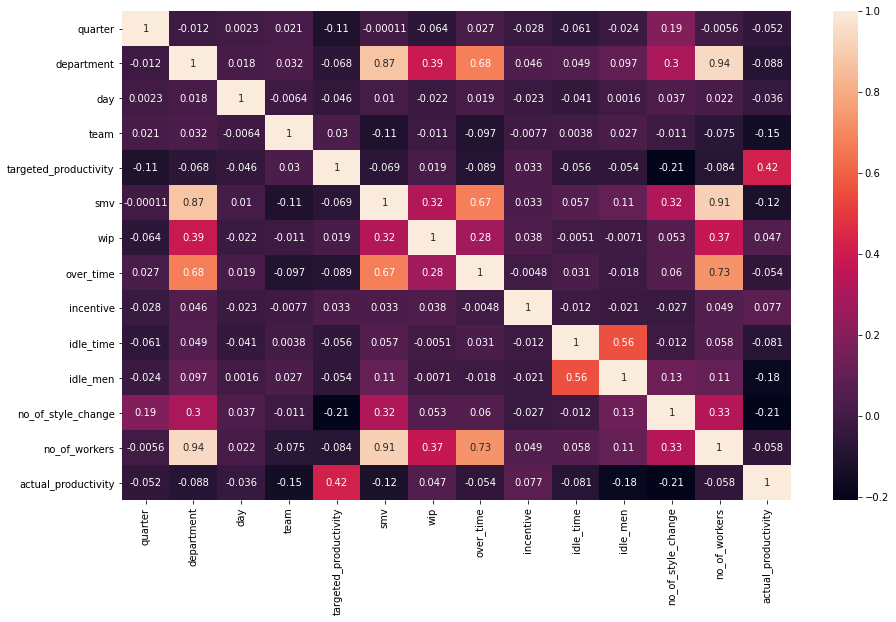

In [ ]:
## preprocessing /////////////////
garments_dataset['wip'] = garments_dataset['wip'].fillna(0)
garments_dataset['quarter'] = garments_dataset['quarter'].map({'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5})
for i in range(len(garments_dataset)):
 garments_dataset['department'][i] = garments_dataset['department'][i].strip()
garments_dataset['department'] = garments_dataset['department'].map({'sweing':1, 'finishing':0})
garments_dataset['day'] = garments_dataset['day'].map({'Saturday':1, 'Sunday':2, 'Monday':3, 'Tuesday':4, 'Wednesday':5,'Thursday':6})
garments_dataset = garments_dataset.drop('date',axis=1)
garments_corr = garments_dataset.corr()
plt.figure(figsize=(15,9))
sns.heatmap(garments_corr,annot=True);

In [ ]:
# relationship between attribute and targeted column with minimum threshold
MIN_THRES = 0.05
garments_final_attr = []
for i in garments_corr.drop(['actual_productivity'],axis=1):
  if abs(garments_corr[i]['actual_productivity']) <= MIN_THRES:
      garments_final_attr.append(i)
print(garments_final_attr)
garments_dataset = garments_dataset.drop(garments_final_attr,axis=1)

# relationship between attribute and attribute with maximum threshold
MAX_THRES = 0.85
list1 = list(garments_corr.columns)
max_final_attr = []
for i in enumerate(list1):
  for j in list1[i[0]+1:]:
    if abs(garments_corr[i[1]][j]) >= MAX_THRES:
      # print(abs(garments_corr[i[1]][j]),i[1],j)
      max_final_attr.append(i[1])
print(max_final_attr)
garments_dataset = garments_dataset.drop(max_final_attr,axis=1)

['day', 'wip']
['department', 'department', 'smv']


In [ ]:
garments_dataset

,quarter,team,targeted_productivity,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,8,0.80,7080,98,0.0,0,0,59.0,0.940725
1,1,1,0.75,960,0,0.0,0,0,8.0,0.886500
2,1,11,0.80,3660,50,0.0,0,0,30.5,0.800570
3,1,12,0.80,3660,50,0.0,0,0,30.5,0.800570
4,1,6,0.80,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...
1192,2,10,0.75,960,0,0.0,0,0,8.0,0.628333
1193,2,8,0.70,960,0,0.0,0,0,8.0,0.625625
1194,2,7,0.65,960,0,0.0,0,0,8.0,0.625625
1195,2,9,0.75,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
print(garments_dataset.isna().sum())
print(garments_dataset.info())

quarter                  0
team                     0
targeted_productivity    0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int64  
 1   team                   1197 non-null   int64  
 2   targeted_productivity  1197 non-null   float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-n

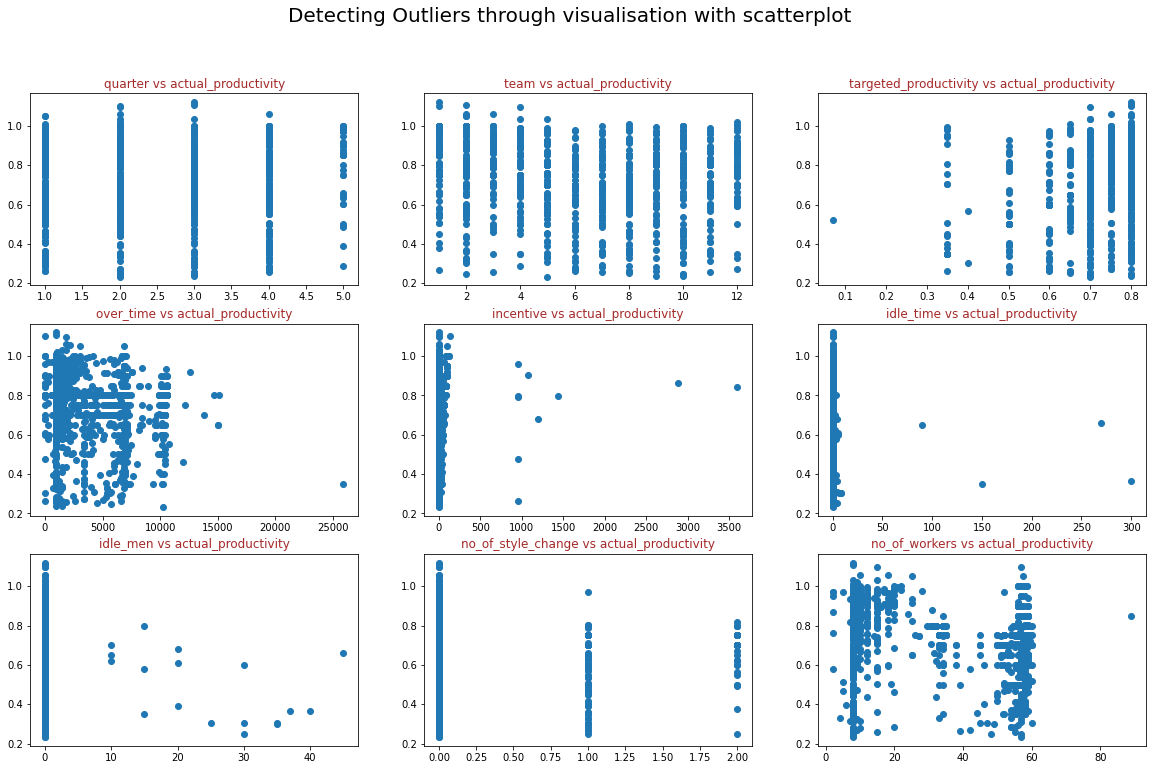

In [ ]:
plt.figure(figsize=(20,12))
for i,j in zip(range(1,10),garments_dataset.columns):
  plt.subplot(3,3,i)
  plt.scatter(garments_dataset[j],garments_dataset.actual_productivity)
  plt.title(f"{j} vs actual_productivity", size=12, color="brown")
plt.suptitle("Detecting Outliers through visualisation with scatterplot",size=20);

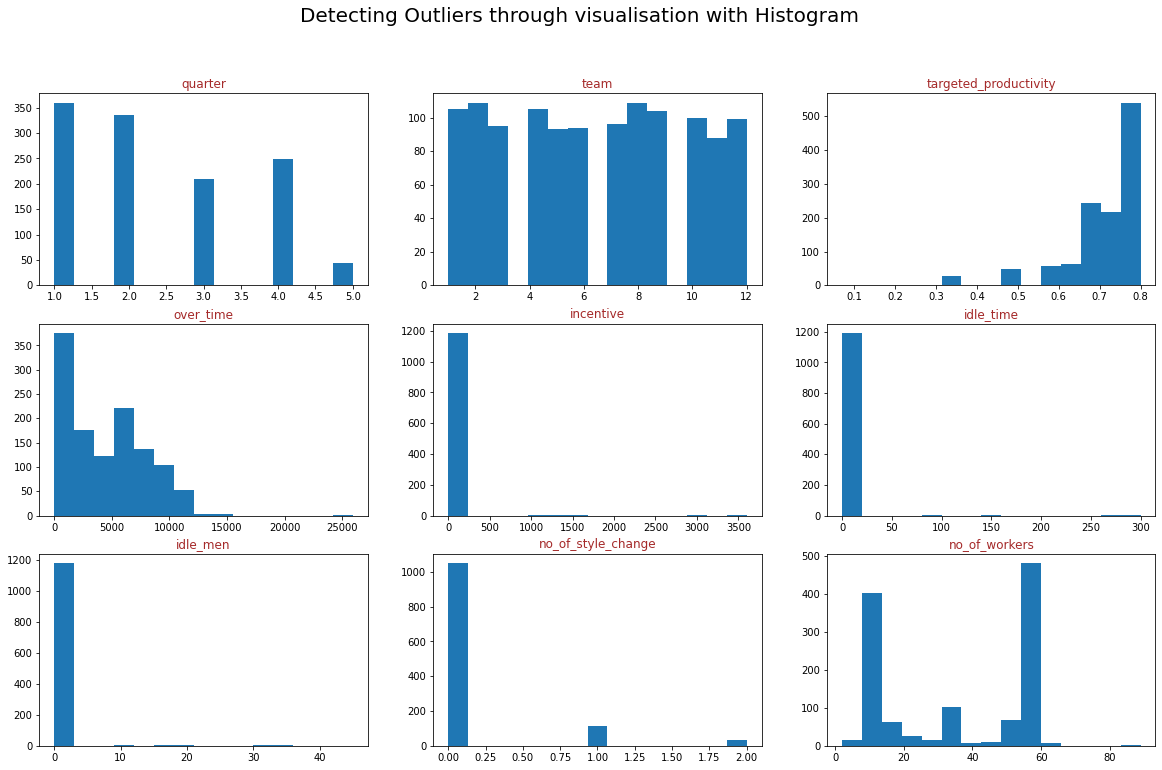

In [ ]:
plt.figure(figsize=(20,12))
for i,j in zip(range(1,10),garments_dataset.columns):
  plt.subplot(3,3,i)
  plt.hist(garments_dataset[j],bins=15)
  plt.title(f"{j}", size=12,color="brown") 
plt.suptitle("Detecting Outliers through visualisation with Histogram",size=20);

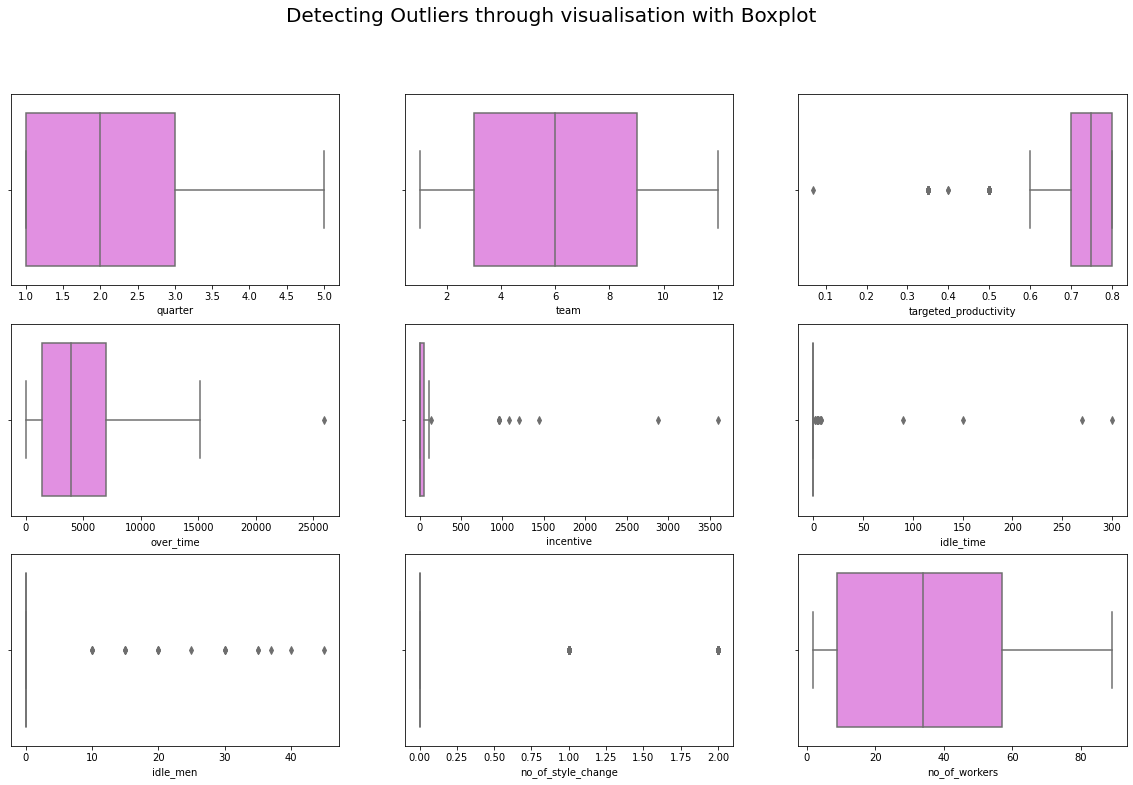

In [ ]:
plt.figure(figsize=(20,12))
for i,j in zip(range(1,10),garments_dataset.columns):
  plt.subplot(3,3,i)
  sns.boxplot(x=garments_dataset[j], color="violet")
plt.suptitle("Detecting Outliers through visualisation with Boxplot",size=20);

In [ ]:
# Quantile
MIN_PERCENTILE_THRES = 0.05
MAX_PERCENTILE_THRES = 0.95
clmns = garments_dataset.columns
for i in garments_dataset.columns: 
  min_thres = garments_dataset[i].quantile(MIN_PERCENTILE_THRES)
  max_thres = garments_dataset[i].quantile(MAX_PERCENTILE_THRES)
  print(f"{i} :                     minimum is {min_thres} and maximum is {max_thres}")


quarter :                     minimum is 1.0 and maximum is 4.0
team :                     minimum is 1.0 and maximum is 12.0
targeted_productivity :                     minimum is 0.5 and maximum is 0.8
over_time :                     minimum is 960.0 and maximum is 10368.000000000004
incentive :                     minimum is 0.0 and maximum is 88.0
idle_time :                     minimum is 0.0 and maximum is 0.0
idle_men :                     minimum is 0.0 and maximum is 0.0
no_of_style_change :                     minimum is 0.0 and maximum is 1.0
no_of_workers :                     minimum is 8.0 and maximum is 59.0
actual_productivity :                     minimum is 0.35551319239999996 and maximum is 0.977037879


In [ ]:
i = 'no_of_workers'
g1 = garments_dataset.copy()

In [ ]:
min_thres = g1[i].quantile(MIN_PERCENTILE_THRES)
max_thres = g1[i].quantile(MAX_PERCENTILE_THRES)
g1 = g1[(g1[i]<max_thres) & (g1[i]>min_thres)]
g1

,quarter,team,targeted_productivity,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2,1,11,0.80,3660,50,0.0,0,0,30.5,0.800570
3,1,12,0.80,3660,50,0.0,0,0,30.5,0.800570
4,1,6,0.80,1920,50,0.0,0,0,56.0,0.800382
5,1,7,0.80,6720,38,0.0,0,0,56.0,0.800125
7,1,3,0.75,6900,45,0.0,0,0,57.5,0.753683
...,...,...,...,...,...,...,...,...,...,...
1188,2,5,0.70,6960,30,0.0,0,1,58.0,0.700557
1189,2,8,0.70,6840,30,0.0,0,1,57.0,0.700505
1190,2,6,0.70,4560,40,0.0,0,1,38.0,0.700246
1191,2,7,0.65,6840,26,0.0,0,1,57.0,0.650596


In [ ]:
i='over_time'
min_thres = g1[i].quantile(MIN_PERCENTILE_THRES)
max_thres = g1[i].quantile(MAX_PERCENTILE_THRES)
g1 = g1[(g1[i]<max_thres) & (g1[i]>min_thres)]
g1

,quarter,team,targeted_productivity,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2,1,11,0.80,3660,50,0.0,0,0,30.5,0.800570
3,1,12,0.80,3660,50,0.0,0,0,30.5,0.800570
4,1,6,0.80,1920,50,0.0,0,0,56.0,0.800382
5,1,7,0.80,6720,38,0.0,0,0,56.0,0.800125
7,1,3,0.75,6900,45,0.0,0,0,57.5,0.753683
...,...,...,...,...,...,...,...,...,...,...
1188,2,5,0.70,6960,30,0.0,0,1,58.0,0.700557
1189,2,8,0.70,6840,30,0.0,0,1,57.0,0.700505
1190,2,6,0.70,4560,40,0.0,0,1,38.0,0.700246
1191,2,7,0.65,6840,26,0.0,0,1,57.0,0.650596


In [ ]:
X = g1.drop(['actual_productivity'], axis=1)
y = g1['actual_productivity']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(x_test, y_test)

0.5218942280906657